**PCA-** Principal Component Analysis

- Reduce the number of a variable of a dataset, while preserving as much as information as possible.

**HOW PCA WORKS??**

1- Standardize the data - (This puts all the features on the same scale)

2- Compute the covariance matrix (to identify correlation)

3- Calculate eigenvalues and eigenvectors of the covariance matrix

4- sort the eigen values in descending order to pick the highest one

5- transform the data

In [1]:
from sklearn import datasets

In [2]:
from sklearn.datasets import load_digits

In [3]:
data = load_digits()

In [6]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

- each image is a tiny 8 x 8 square -> 64 features
- 8x8 = 64 pixels value
- it means each image is represented as 64 features(64 pixels value)

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
import pandas as pd
import numpy as np

In [10]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [12]:
df['Target'] = data.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [15]:
print('Target is ', data.target[0])
data.data[0]

Target is  0


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

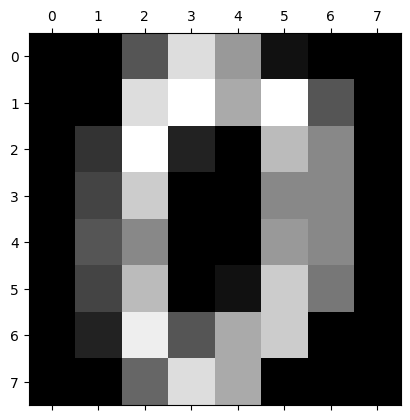

In [20]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(data.data[0].reshape(8,8))
plt.show()

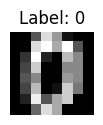

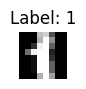

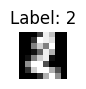

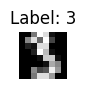

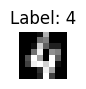

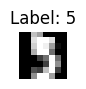

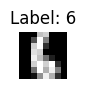

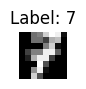

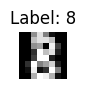

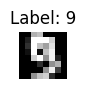

In [26]:
# check my target -> images from 0 to 9

num_imges = 10
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(data.images[i], cmap='gray')
    plt.title(f'Label: {data.target[i]}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [27]:
# Split the data into x nd y 

In [31]:
x = df.iloc[:,:-1]
y = data.target

In [32]:
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [33]:
y

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [34]:
x.shape

(1797, 64)

In [35]:
y.shape

(1797,)

lets apply PCA here

In [36]:
# Step - 1 - Standardize the data 

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]], shape=(1797, 64))

In [41]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,0.482974,0.759622,-0.058426,1.127721,0.879583,-0.130433,-0.044625,0.111443,0.895880,-0.860666,-1.149648,0.515472,1.905963,-0.114222,-0.03338,0.486489,0.469885,-1.499901,-1.614063,0.076398,1.541814,-0.047232,0.0,0.764656,0.052630,-1.447630,-1.736664,0.043616,1.439558,0.0,-0.061344,0.810554,0.630117,-1.122457,-1.066232,0.660965,0.818451,-0.088742,-0.035433,0.742119,1.150652,-0.868671,0.110130,0.537611,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-0.246304,1.196450,0.136195,-0.514991,-0.130433,-0.044625,-0.727646,-1.213385,1.380308,1.441860,-0.291553,-0.548805,-0.114222,-0.03338,1.440185,0.954513,1.220586,0.987402,-0.945588,-0.628896,-0.047232,0.0,-0.672372,-1.054452,1.105570,0.960644,-0.978702,-0.822695,0.0,-0.061344,-0.531284,-0.899839,1.362175,1.330789,-0.392787,-0.798272,-0.088742,-0.035433,-0.403575,-1.153118,1.236394,1.242083,-0.457500,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,-1.362062,1.011104,0.987304,0.962467,-0.514991,-0.130433,-0.044625,-0.727646,-0.334525,1.035543,0.146106,1.322497,-0.548805,-0.114222,-0.03338,-0.785105,-1.307084,-0.479719,0.824811,0.587391,-0.628896,-0.047232,0.0,-0.384967,0.052630,0.626845,0.792062,-1.319475,-0.822695,0.0,-0.061344,2.487851,1.395095,1.362175,-0.427026,-1.446538,-0.798272,-0.088742,-0.035433,1.314966,0.973439,1.236394,1.242083,0.371759,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,0.482974,-1.503711,0.987304,-0.690077,-0.514991,-0.130433,-0.044625,-0.168254,-1.564930,1.035543,0.955952,-1.259982,-0.548805,-0.114222,-0.03338,-0.785105,-1.145542,1.050555,0.174444,-1.115919,-0.628896,-0.047232,0.0,-0.672372,-1.212607,-1.288055,0.286317,0.554775,-0.539913,0.0,-0.061344,-0.531284,-1.052835,-1.122457,-1.066232,0.309714,1.049411,-0.088742,-0.035433,-0.403575,0.087374,-1.060040,-0.833165,0.869315,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,-1.915573,-1.252229,-0.476718,-1.351095,-0.514991,-0.130433,-0.044625,-0.727646,-1.564930,1.035543,-0.177833,-0.937173,0.064887,-0.114222,-0.03338,-0.785105,-0.337828,1.050555,-1.614063,0.246729,1.541814,-0.047232,0.0,0.764656,1.317867,0.148120,-1.736664,1.236320,0.873995,0.0,-0.061344,0.810554,1.242100,1.362175,0.851385,1.363466,-0.567312,-0.088742,-0.035433,-0.403575,-1.330331,-1.251410,1.053424,0.205907,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,1.036485,0.508141,0.359866,1.292976,0.321753,-0.130433,-0.044625,0.391139,1.071653,-0.171136,-0.663741,1.322497,0.678579,-0.114222,-0.03338,-0.785105,0.469885,1.220586,0.987402,1.439046,0.727798,-0.047232,0.0,-0.672372,-1.212607,-0.809330,-1.062337,1.236320,1.439558,0.0,-0.061344,-0.531284,-1.052835,-1.122457,-1.226033,1.187841,0.356530,-0.088742,-0.035433,-0.403575,-0.444265,-0.485932,-0.455847,1.201019,0.055897,-0.209785,-0.023596,-0.299081,-0.697

In [42]:
# Step - 2 -> Compute co-variance matrix
# In order to find out the relation b/w features

In [43]:
x1 = x_scaled.T
pd.DataFrame(x1)

0         1         2         3         4         5         6     \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  -0.335016 -0.335016 -0.335016 -0.335016 -0.335016 -0.335016 -0.335016   
2  -0.043081 -1.094937 -1.094937  0.377661 -1.094937  1.429517 -1.094937   
3   0.274072  0.038648 -1.844742  0.744919 -2.551014 -0.432200  0.038648   
4  -0.664478  0.268751  0.735366  0.268751 -0.197863 -2.764242  0.268751   
..       ...       ...       ...       ...       ...       ...       ...   
59  0.208293 -0.249010 -2.078218  0.208293 -2.306869  0.894246 -0.706312   
60 -0.366771  0.849632 -0.164037  0.241430  0.849632  0.849632  0.646898   
61 -1.146647  0.548561  1.565686  0.379040 -0.468564  0.548561  0.718081   
62 -0.505670 -0.505670  1.695137 -0.505670 -0.505670 -0.505670  0.227932   
63 -0.196008 -0.196008 -0.196008 -0.196008 -0.196008 -0.196008 -0.196008   

        7         8         9         10        11        12        13    \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  -0.335016 -0.335016 -0.335016 -0.335016 -0.335016 -0.335016  1.870202   
2   0.377661  0.798404  1.219146 -0.884566 -1.094937 -0.043081  0.798404   
3  -0.903047  0.509495  0.038648 -0.667624 -2.786437  0.038648  0.744919   
4   0.268751 -0.897785 -2.764242  0.735366  0.502058 -2.530935  0.502058   
..       ...       ...       ...       ...       ...       ...       ...   
59 -1.620916  0.894246 -0.020358 -0.477661 -2.535520 -0.249010 -0.020358   
60 -2.394110  0.646898  0.241430  0.241430  0.241430 -0.772239  0.241430   
61 -1.146647  0.718081 -0.638085 -0.638085  1.565686  1.057123  0.718081   
62 -0.505670 -0.261136 -0.505670 -0.505670 -0.261136  2.428739 -0.505670   
63 -0.196008 -0.196008 -0.196008 -0.196008 -0.196008  1.954988 -0.196008   

        14        15        16        17        18        19        20    \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  -0.335016  5.178030 -0.335016 -0.335016 -0.335016 -0.335016 -0.335016   
2  -1.094937  1.429517 -1.094937 -0.884566  1.008775  0.167290 -0.463823   
3  -0.903047  0.274072 -0.903047 -0.903047 -1.138471  0.509495  0.274072   
4   0.735366  0.968673  0.735366  0.735366  0.268751 -1.831013 -0.197863   
..       ...       ...       ...       ...       ...       ...       ...   
59 -0.477661  0.894246 -1.163614 -0.249010  0.436944  0.894246 -0.020358   
60  0.646898 -1.988642  0.646898 -0.569505 -1.380441  0.849632  0.241430   
61 -0.468564 -1.146647  1.565686 -1.146647 -1.146647  1.057123 -0.468564   
62 -0.505670 -0.505670  2.184205 -0.505670 -0.505670  2.184205 -0.505670   
63 -0.196008 -0.196008 -0.196008 -0.196008 -0.196008  0.341741 -0.196008   

        21        22        23        24        25        26        27    \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  -0.335016 -0.335016  0.767593 -0.335016 -0.335016 -0.335016 -0.335016   
2  -1.094937  0.588032  0.588032 -1.094937  1.429517 -0.884566 -1.094937   
3  -2.315590  0.980343  0.038648 -2.786437 -0.903047  0.274072 -0.903047   
4   0.968673 -1.597706  0.735366  0.035444 -0.897785  0.502058  0.502058   
..       ...       ...       ...       ...       ...       ...       ...   
59 -2.306869 -0.020358  0.665595 -2.764171  0.436944 -0.020358 -0.020358   
60  0.038697  0.038697 -0.164037  0.038697 -0.569505  0.646898  0.241430   
61  1.396165  0.887602 -0.807606  0.209519 -1.146647  1.226644 -0.977127   
62  0.472467  2.673273 -0.505670 -0.505670 -0.505670  1.206069 -0.505670   
63 -0.196008  0.341741 -0.196008 -0.196008 -0.196008 -0.196008 -0.196008   

        28        29        30        31        32        33        34    \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  -0.335016 -0.335016 -0.335016 -0.335016  1.870202  6.280639 -0.335016   
2   1.008775  0.798404  1.008775 -0.674195  1.639888  1.639888 -1.094937   
3  -0.196776  0.274072  0.509495  0.274072  0.980343

In [44]:
cov_mat = np.cov(x_scaled.T)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000557,0.556928,0.207929,-0.018771,0.060810,0.048415,-0.038948,0.032338,0.556682,0.224647,-0.109117,0.027923,-0.064019,-0.029990,-0.043722,-0.005112,0.213705,-0.113644,-0.105941,0.096307,-0.170165,-0.131403,-0.038288,-0.011189,-0.085959,-0.146465,0.073021,0.041106,-0.206433,-0.150838,-0.015832,0.0,-0.168389,-0.178587,0.044164,-0.059892,-0.235907,-0.173342,0.0,-0.020563,-0.124336,-0.143079,0.024256,-0.054747,-0.163363,-0.086514,-0.025750,-0.011877,0.225901,0.115345,0.020393,0.031472,-0.009585,0.030970,-0.045368,-0.007910,0.856086,0.556036,0.147728,-0.102406,-0.029887,0.026562,-0.043913
2,0.0,0.556928,1.000557,0.560492,-0.084282,0.043593,0.002842,-0.062313,0.022324,0.582583,0.631819,-0.286185,0.028814,0.063283,-0.089271,-0.100582,-0.016952,0.279019,-0.084298,-0.310899,0.208843,-0.086678,-0.217778,-0.118991,-0.036569,-0.153185,-0.310691,0.108438,0.199873,-0.193867,-0.192188,-0.051745,0.0,-0.344253,-0.396652,-0.055746,-0.120454,-0.279945,-0.183423,0.0,-0.067205,-0.268878,-0.342134,-0.157557,-0.203360,-0.190082,-0.069254,-0.064818,-0.038819,0.205911,0.262322,-0.042555,-0.051559,0.082911,0.050877,-0.003806,-0.025851,0.515563,0.938145,0.500118,-0.134829,-0.041206,0.072639,0.082569
3,0.0,0.207929,0.560492,1.000557,0.023952,-0.171473,-0.115796,-0.040162,0.035683,0.328527,0.596812,-0.002442,-0.068664,0.023176,-0.178903,-0.113894,0.022749,0.187916,0.040538,-0.360640,0.067980,-0.018325,-0.225018,-0.149841,-0.002641,-0.109321,-0.256436,-0.057140,0.090228,-0.183359,-0.141853,-0.067710,0.0,-0.227582,-0.224502,0.017616,-0.078007,-0.226619,-0.037244,0.0,-0.099680,-0.257979,-0.102260,-0.025316,-0.243965,-0.214864,0.089753,0.046945,-0.062833,0.015456,0.299929,0.279576,-0.180632,0.022409,0.139475,0.075376,-0.049112,0.175902,0.560638,0.768373,-0.065993,-0.054966,0.053467,0.082016
4,0.0,-0.018771,-0.084282,0.023952,1.000557,0.508014,0.127835,0.010070,0.042089,0.051686,0.014006,-0.135790,0.160358,0.390252,0.133699,0.014513,0.009916,0.036632,-0.124521,-0.155587,-0.029041,0.182773,0.078376,0.023900,0.008976,0.027058,-0.063230,0.036251,0.089704,0.122616,0.078100,0.012701,0.0,-0.028088,-0.015673,0.026608,0.069954,0.089136,0.051437,0.0,0.023655,-0.018374,-0.095207,-0.037596,0.051742,0.074616,-0.090171,-0.039552,0.024162,-0.020588,-0.165693,-0.043673,0.030331,-0.120628,-0.265116,-0.212339,0.017362,-0.047250,-0.020187,-0.008872,-0.082171,-0.215929,-0.250838,-0.215469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.147728,0.500118,0.768373,-0.008872,-0.068076,-0.045871,0.001013,0.043398,0.305361,0.634445,0.048290,-0.160577,0.070561,-0.066914,-0.055108,0.021551,0.227565,0.140454,-0.340207,-0.063278,-0.015597,-0.130327,-0.110918,-0.000680,-0.023925,-0.189694,-0.053607,0.036487,-0.190487,-0.157863,-0.030678,0.0,-0.212819,-0.285548,-0.077900,-0.116675,-0.195208,-0.041779,0.0,-0.078437,-0.232945,-0.163889,-0.166237,-0.198045,-0.129254,0.081948,0.006893,-0.040630,0.036485,0.229197,0.153751,-0.061718,0.065216,0.094770,0.050060,-0.038269,0.113035,0.481979,1.000557,0.058423,-0.095009,0.006853,0.099727
60,0.0,-

In [45]:
# STEP 3 - EIGEN VALUE AND EIGEN VECTOR OF COVARIANCE MATRIX

#### Eigenvectors -> the new direction along which the data is spread out the most
#### Eigenvalues -> tells us how much varience (information) is captured along with each eigenvector

In [47]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [48]:
pd.DataFrame(eig_vals)

,0
0,7.344776
1,5.835491
2,5.153961
3,3.966236
4,2.966345
...,...
59,0.200091
60,0.189835
61,0.000000
62,0.000000


In [51]:
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,0.182234,-0.047027,0.023588,-0.178153,-0.029978,0.231723,-0.108310,-0.125524,-0.213820,-0.059834,0.049941,0.204254,0.133801,-0.041487,0.130818,0.082027,-0.171821,-0.065722,0.137138,-0.098283,-0.006642,0.029304,0.114117,-0.196266,0.101727,0.120121,-0.037933,0.095185,0.097288,0.046406,0.069916,0.050244,0.060175,-0.002171,-0.102210,0.087139,0.024623,-0.022276,0.063996,-0.026354,0.022867,-0.085241,-0.015791,-0.016542,-0.023658,-0.013188,0.064751,0.562510,-0.134134,-0.203051,0.159522,-0.023657,0.136114,-0.168755,0.039356,-0.036629,0.082404,0.052290,0.197267,0.024853,0.052605,0.0,0.0,0.0
2,0.285868,-0.059565,-0.056799,-0.156129,-0.014666,0.119875,-0.004755,-0.006178,-0.120140,-0.007681,0.147540,-0.044570,0.031574,0.038609,-0.100309,0.022455,0.018188,0.016911,0.020551,0.025342,0.117158,-0.005074,-0.134998,0.011292,0.011514,-0.068861,0.158987,-0.058283,-0.269276,-0.025233,-0.010893,-0.047724,-0.069043,0.008342,0.095020,-0.024501,-0.025384,0.141543,-0.187823,0.686446,-0.139281,-0.033334,0.052102,0.044499,0.101491,0.098357,-0.024959,0.036255,0.067830,-0.076872,0.002794,-0.021571,0.052227,-0.008411,-0.080164,0.176636,0.091203,-0.001822,-0.129372,-0.069592,-0.090823,0.0,0.0,0.0
3,0.220370,0.020804,-0.040464,-0.167800,0.043716,-0.100392,0.233717,0.033408,0.101895,0.021639,0.155505,-0.188568,0.064244,0.183513,-0.044552,0.074244,-0.024539,0.010330,-0.024455,0.001167,0.039253,-0.106731,0.031537,-0.134422,0.114013,0.030726,-0.129626,0.097933,-0.086204,0.171524,-0.024466,0.040695,0.122914,0.030803,0.100501,-0.099773,-0.121309,-0.140677,0.192645,-0.018188,-0.015434,0.099778,0.074707,0.120277,-0.060721,0.067932,0.080744,0.057566,-0.069727,0.227598,0.161706,-0.138867,-0.312667,-0.251349,0.125306,-0.224852,-0.089657,0.040788,-0.148353,0.052446,-0.323498,0.0,0.0,0.0
4,-0.025170,-0.155903,-0.067065,0.000009,-0.139993,-0.093471,-0.039540,-0.046161,0.093102,-0.005066,-0.163472,-0.059178,0.073513,0.158989,0.299957,0.291598,0.043592,-0.329826,-0.215418,0.183349,0.089078,-0.313472,0.256792,-0.136360,-0.042908,-0.127998,-0.010016,-0.076130,-0.050861,0.177831,0.069299,-0.090964,0.089213,0.010605,-0.164332,-0.037811,-0.040325,0.135681,0.004931,0.056287,0.013144,0.208727,0.039015,0.165961,0.035744,-0.045223,-0.070202,-0.000663,0.033402,-0.099464,-0.109118,0.204155,0.139449,0.022663,0.049967,-0.024456,0.039529,0.012110,-0.072823,-0.057241,0.048470,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.194449,0.009905,-0.083464,-0.171490,0.100375,-0.086503,0.135319,0.098852,0.115978,0.105825,0.121201,-0.236655,0.042706,0.262494,-0.081153,0.074291,-0.013292,0.040549,-0.045488,-0.015010,-0.106982,-0.089599,0.120630,-0.040321,0.237434,0.131049,-0.033045,0.016252,0.057169,0.048019,-0.084464,0.034424,0.038414,0.057748,0.177854,-0.051180,0.050351,-0.165062,-0.006137,0.042972,0.110623,-0.105299,-0.032100,-0.252308,-0.045709,-0.005867,-0.137432,-0.060826,-0.019611,-0.181839,-0.108749,0.135819,0.214148,0.248310,-0.067003,0.101720,-0.245611,-0.069682,0.336075,0.080163,0.138750,0.0,0.0,0.0
60,0.017774,0.251934,-0.062455,

In [52]:
# Explained Variance - It is the amount of variance (information) our each component captures from the original dataset

In [53]:
tot = sum(eig_vals)

In [54]:
tot

np.float64(61.03396436525616)

In [55]:
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse = True)]
var_exp

[np.float64(12.033916097734915),
 np.float64(9.561054403097891),
 np.float64(8.44441489262456),
 np.float64(6.49840790752418),
 np.float64(4.860154875966401),
 np.float64(4.214119869271918),
 np.float64(3.9420828035673936),
 np.float64(3.3893809246383313),
 np.float64(2.998221011625239),
 np.float64(2.9320025512522094),
 np.float64(2.7818054635502962),
 np.float64(2.5770550925819933),
 np.float64(2.2753033157642393),
 np.float64(2.22717973951436),
 np.float64(2.1652294318492435),
 np.float64(1.9141666064421339),
 np.float64(1.7755470851682105),
 np.float64(1.6380692742844174),
 np.float64(1.5964601688623552),
 np.float64(1.4891911870878147),
 np.float64(1.3479695658179345),
 np.float64(1.2719313702347725),
 np.float64(1.165837350591948),
 np.float64(1.0576465985363235),
 np.float64(0.9753159471981055),
 np.float64(0.9445589897320025),
 np.float64(0.86301382697072),
 np.float64(0.8366428536685085),
 np.float64(0.7976932484112421),
 np.float64(0.7464713709260682),
 np.float64(0.725582151

In [57]:
cum_var_exp = np.cumsum(var_exp)
pd.DataFrame(cum_var_exp)

,0
0,12.033916
1,21.594971
2,30.039385
3,36.537793
4,41.397948
...,...
59,99.917465
60,100.000000
61,100.000000
62,100.000000


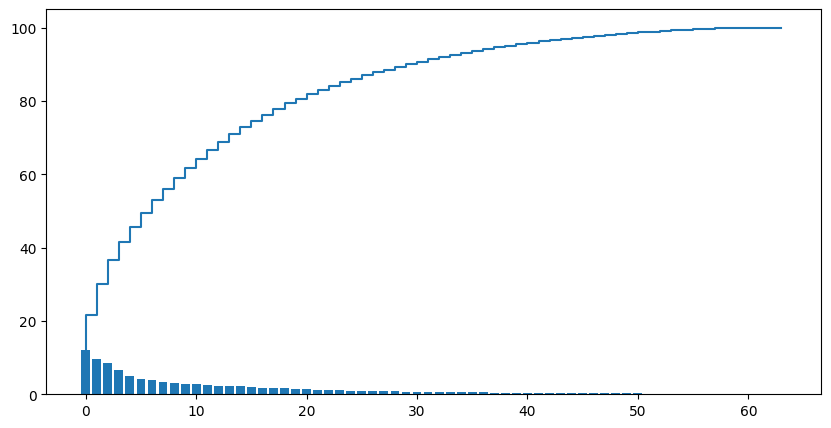

In [58]:
#screeplot
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)), var_exp, label = 'Individual explained Variance')
plt.step(range(len(cum_var_exp)), cum_var_exp, label = 'Cummulated Explained Variance')
plt.show()

In [59]:
# Apply PCA 

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(0.95) # this tells pca to retain enough components such that 95% variance is captured

In [62]:
x_pca = pca.fit_transform(x)

In [63]:
x_pca.shape

(1797, 29)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [69]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size = 0.20, random_state = 42)

In [73]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [75]:
y_pred = model.predict(x_test_pca)

In [76]:
from sklearn.metrics import *

In [77]:
accuracy_score(y_pred, y_test)*100

96.11111111111111